In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Information about the dataset

- `gender`: The gender of the student.
- `race/ethnicity`: The race or ethnicity of the student.
- `parental level of education`: The education level of the student's parents.
- `lunch`: The type of lunch received by the student.
- `test preparation course`: Whether the student completed a test preparation course.
- `math score`: The score achieved in the math exam.
- `reading score`: The score achieved in the reading exam.
- `writing score`: The score achieved in the writing exam.

In [3]:
df.shape

(1000, 8)

In [4]:
#missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#duplicate values
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
numerical_columns = [x for x in df.columns if df[x].dtype != 'O']
categorical_columns = [x for x in df.columns if df[x].dtype == 'O']
print(f'We have {len(numerical_columns)} numerical columns : ',numerical_columns)
print(f'We have {len(categorical_columns)} categorical columns : ', categorical_columns)

We have 3 numerical columns :  ['math score', 'reading score', 'writing score']
We have 5 categorical columns :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
df['total_score'] = df['math score']+df['writing score']+df['reading score']
df['average_score'] = df['total_score']/3

In [20]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [28]:
math_full = df[df['math score']==100]['average_score'].count()
reading_full = df[df['reading score']==100]['average_score'].count()
writing_full = df[df['writing score']==100]['average_score'].count()

print(f'Students scoring full marks in math are {math_full}')
print(f'Students scoring full marks in reading are {reading_full}')
print(f'Students scoring full marks in writing are {writing_full}')

Students scoring full marks in math are 7
Students scoring full marks in reading are 17
Students scoring full marks in writing are 14


In [33]:
math_less_than_20 = df[df['math score']<=20]['average_score'].count()
writing_less_than_20 = df[df['writing score']<=20]['average_score'].count()
reading_less_than_20 = df[df['reading score']<=20]['average_score'].count()

print(f'No. of students scoring less than 20 in math are {math_less_than_20}')
print(f'No. of students scoring less than 20 in writing are {writing_less_than_20}')
print(f'No. of students scoring less than 20 in reading are {reading_less_than_20}')


No. of students scoring less than 20 in math are 4
No. of students scoring less than 20 in writing are 3
No. of students scoring less than 20 in reading are 1


## Conclusion
- From the above data we can conclude that
- students have the best performance in reading
- students have the worst performance in math

# Visualization

<Axes: xlabel='average_score', ylabel='Count'>

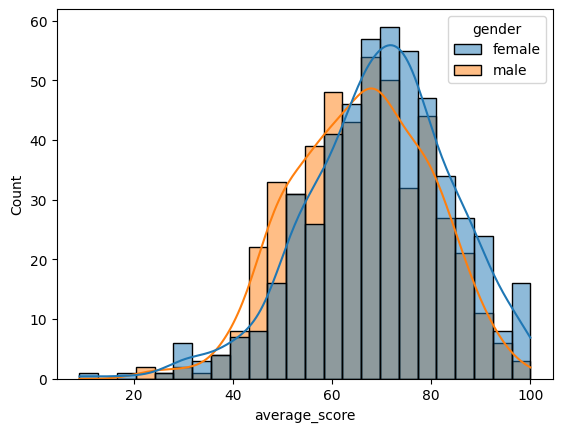

In [40]:
sns.histplot(data = df, x = 'average_score', hue = 'gender', kde = True)

<Axes: xlabel='average_score', ylabel='Density'>

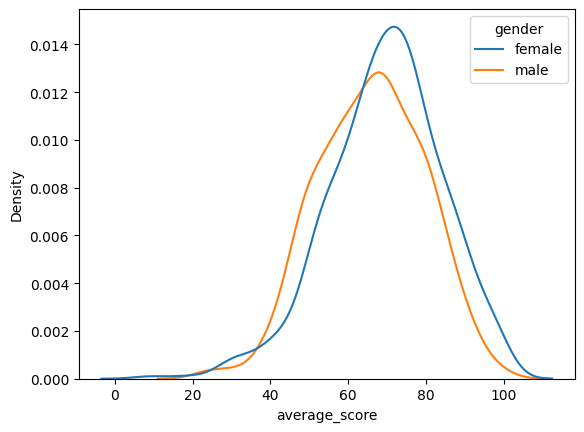

In [39]:
sns.kdeplot(data = df, x = 'average_score', hue = 'gender')

<Axes: xlabel='total_score', ylabel='Count'>

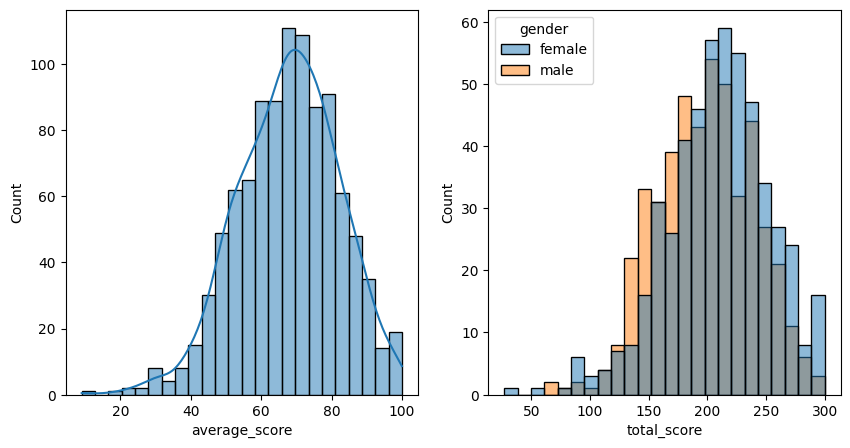

In [65]:
fig, axs = plt.subplots(1,2,figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df['average_score'],kde=True)
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'total_score', hue = 'gender')

# Insight

- Male students are slightly underperforming than female students
- Average score of males < average score of females

<Axes: xlabel='average_score', ylabel='Count'>

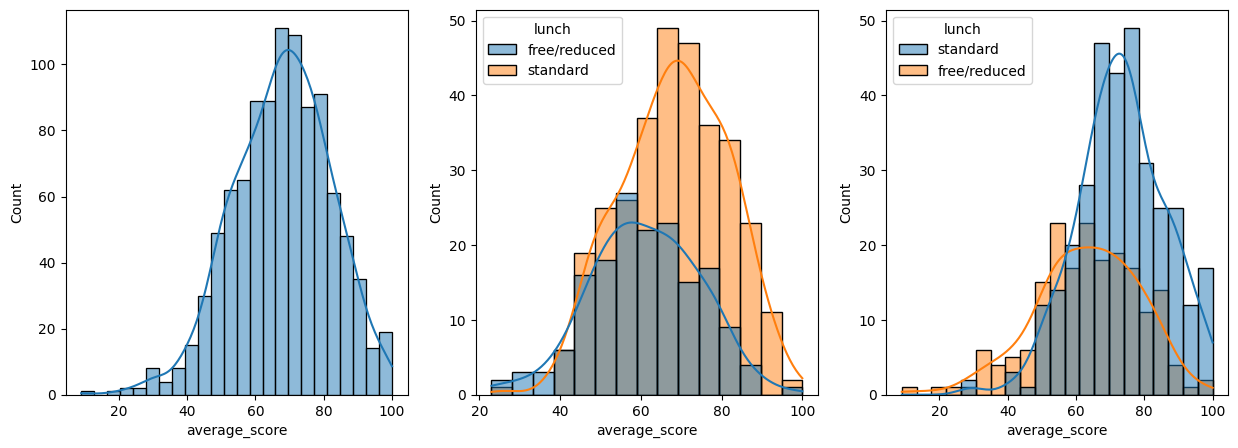

In [82]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average_score',kde = True)
plt.subplot(1,3,2)
sns.histplot(data = df[df['gender']=='male'], x = 'average_score',kde = True, hue = 'lunch')
plt.subplot(1,3,3)
sns.histplot(data = df[df['gender']=='female'], x = 'average_score',kde = True, hue = 'lunch')

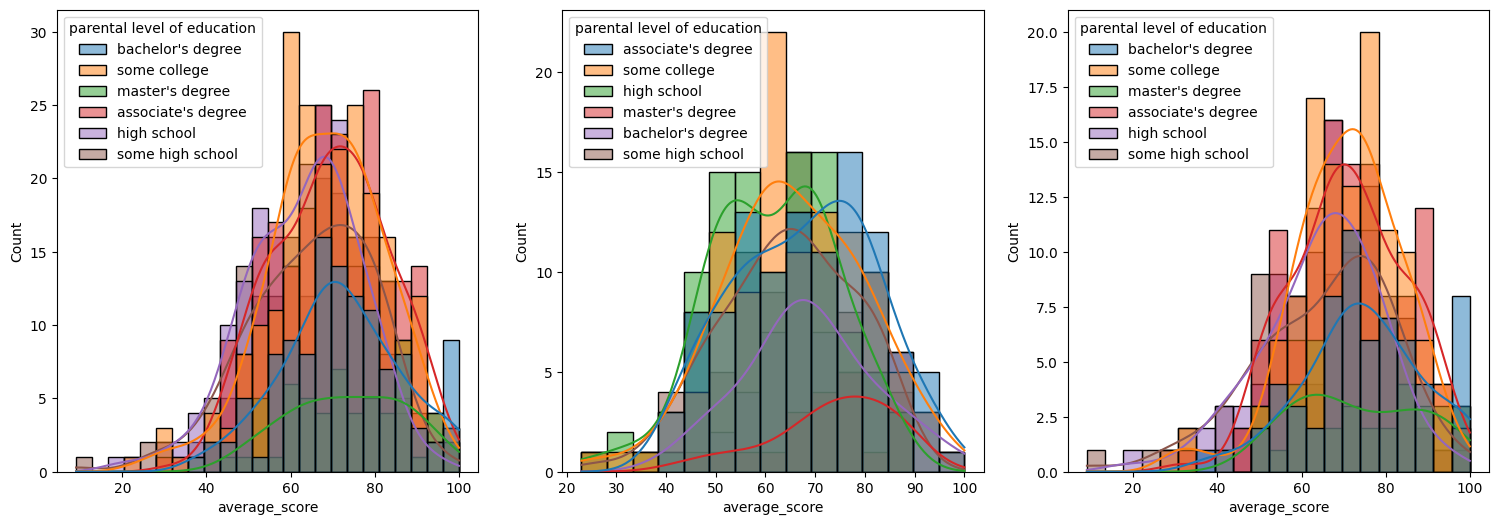

In [90]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

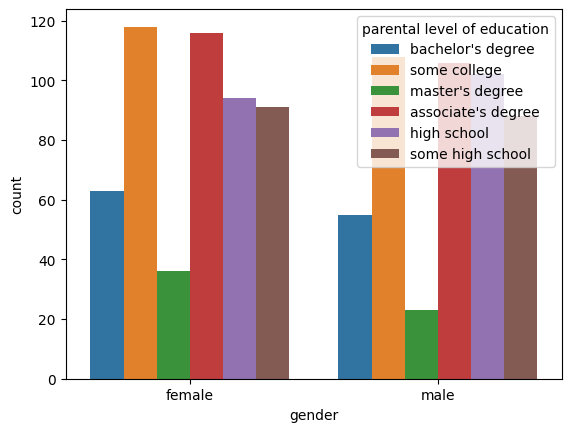

In [88]:
sns.countplot(data = df, x = 'gender', hue = 'parental level of education')

<Axes: xlabel='race/ethnicity', ylabel='count'>

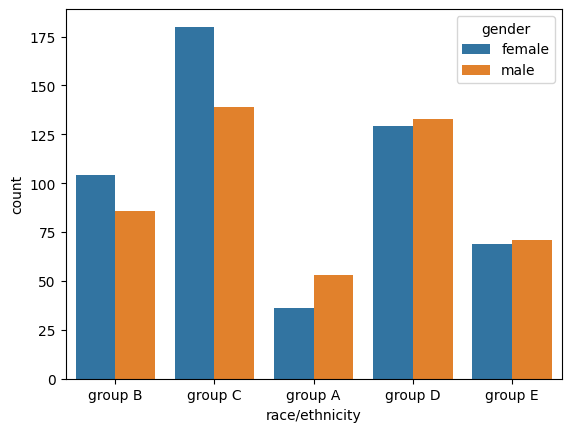

In [91]:
sns.countplot(data = df, x = 'race/ethnicity', hue = 'gender')